# Song lyrics exploration - Part 2: Word clouds

# Word cloud

Word clouds are a fun and oftentimes helpful technique for visualizing natural language data. They can show words scaled by any metric, although term frequency and term-frequency inverse-document-frequency (TF-IDF) are the most common metrics. For a multi-class or multi-label classification problem, word clouds can highlight the similarities and differences between separate classes by treating each class as its own document to compare with all others. The word clouds seen here were made with the `WordCloud` generator by [amueller](https://github.com/amueller/word_cloud), with pre-processing done via `gensim` and `nltk`.

In the case of heavy metal genre classification, term frequency alone is not too illuminating: the five genres we analyze here share a lot of common themes since they are all still metal. TF-IDF does much better at picking out the words that are unique to a genre. We see much of what we'd expect from a cursory understanding of each genre: black metal lyrics deal with topics like the occult, religion, and nature; death metal obsesses over the obscene and horrifying; heavy metal revolves around themes more familiar to rock and pop; power metal adopts the vocabulary of fantasies and histories; and thrash metal sings of violence, war, and... beer?

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from wordcloud import WordCloud

from nlp import get_stopwords, tokenize

### Data

In [2]:
df = pd.read_csv('songs-ml-1pct.csv')
genres = df.columns[1:]

### Combine songs from same genre into documents

In [3]:
tokenize_kwargs = dict(stopwords=get_stopwords())
corpus = []
for genre in genres:
    tokenized = df[df[genre] == 1].lyrics.apply(lambda x: ' '.join(tokenize(x, **tokenize_kwargs)))
    corpus.append(' '.join(tokenized))

In [4]:
print("genre word counts:")
for i, genre in enumerate(genres):
    print(f"{genre:<15}{len(corpus[i].split())}")

genre word counts:
black          554135
death          1152108
deathcore      57035
doom           242229
folk           125485
gothic         161295
grindcore      102773
heavy          615694
metalcore      112789
power          809519
progressive    396631
symphonic      212008
thrash         641867


In [5]:
print("genre vocabulary sizes:")
for i, genre in enumerate(genres):
    print(f"{genre:<15}{len(set(corpus[i].split()))}")

genre vocabulary sizes:
black          18227
death          23033
deathcore      7072
doom           12135
folk           10006
gothic         10001
grindcore      11512
heavy          13729
metalcore      7642
power          14307
progressive    14551
symphonic      11522
thrash         16499


# Word cloud

In [6]:
def get_wordcloud_frequencies(texts, tfidf=False, min_df=0):
    print("tokenizing corpus")
    texts = [tokenize(text) for text in texts]
    print("creating dictionary")
    dictionary = Dictionary(texts)
    print("generating bag-of-words representation")
    vectors = [dictionary.doc2bow(text) for text in texts]
    if min_df > 0:
        print("filtering words")
        vectors = [[(id_, count) for id_, count in vector if count > min_df] for vector in vectors]
    if tfidf:
        print("generating TF-IDF model")
        tfidf = TfidfModel(vectors)
        vectors = [tfidf[vector] for vector in vectors]
    print("generating frequency dictionaries for WordCloud")
    out = []
    for vector in vectors:
        out.append({dictionary[id_]: count for id_, count in vector})
    return out

### Full corpus

tokenizing corpus
creating dictionary
generating bag-of-words representation
generating frequency dictionaries for WordCloud


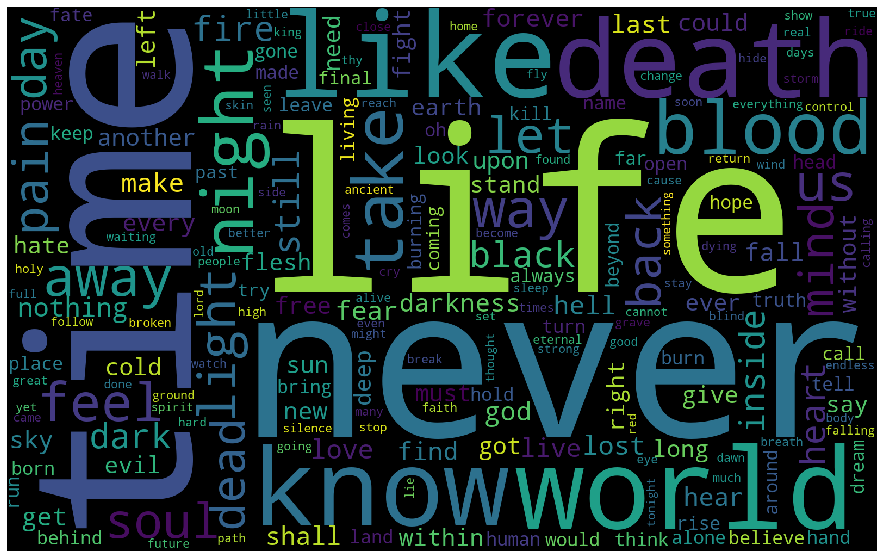

In [7]:
full_text = ' '.join(corpus)
word_freqs = get_wordcloud_frequencies([full_text], tfidf=False, min_df=0)
word_cloud = WordCloud(width=1600, height=1000).fit_words(word_freqs[0])
plt.figure(figsize=(16, 10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### By genre

tokenizing corpus
creating dictionary
generating bag-of-words representation
filtering words
generating TF-IDF model
generating frequency dictionaries for WordCloud
black


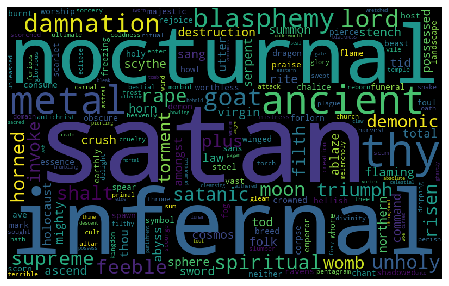

death


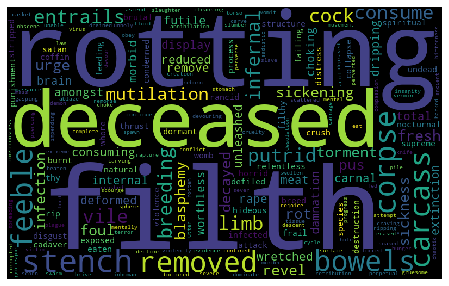

deathcore


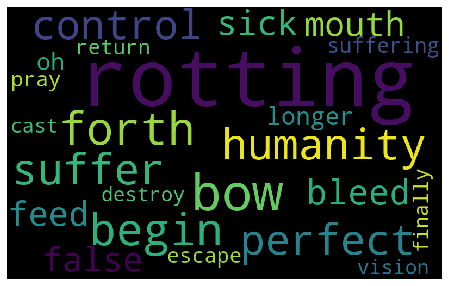

doom


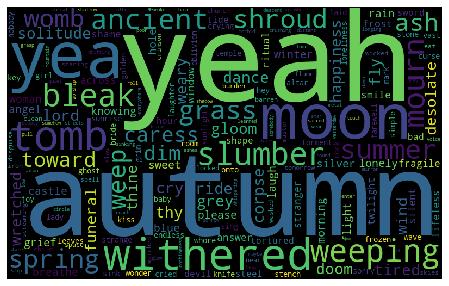

folk


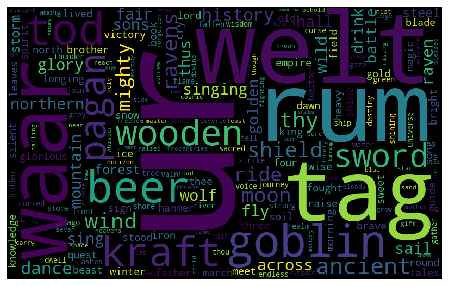

gothic


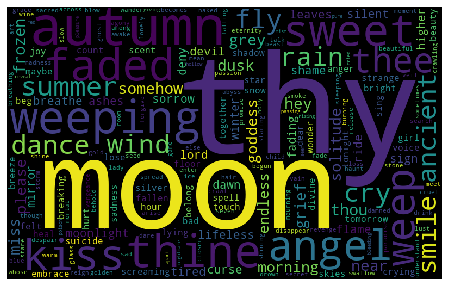

grindcore


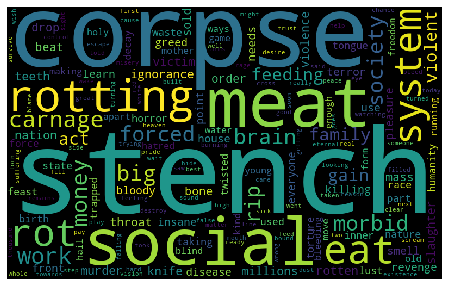

heavy


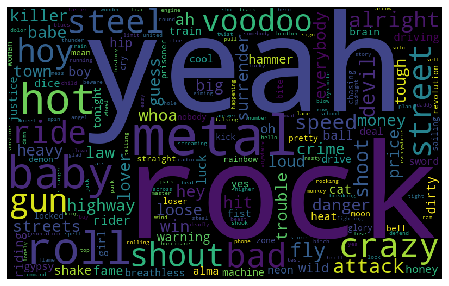

metalcore


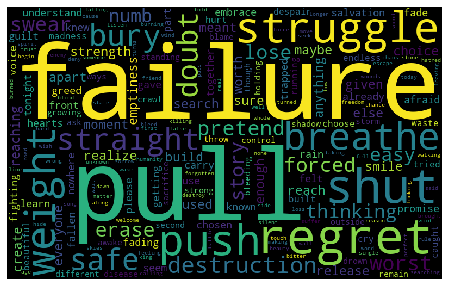

power


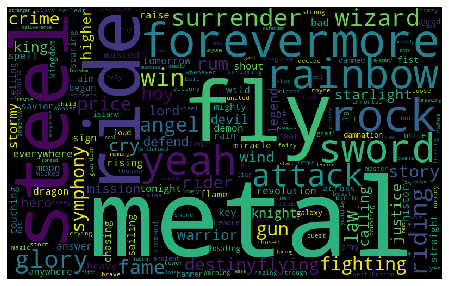

progressive


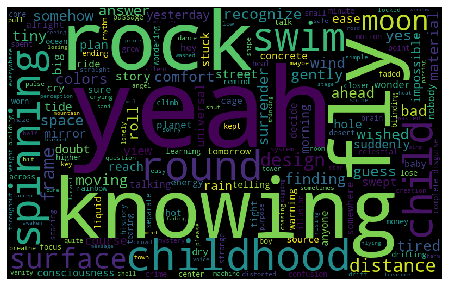

symphonic


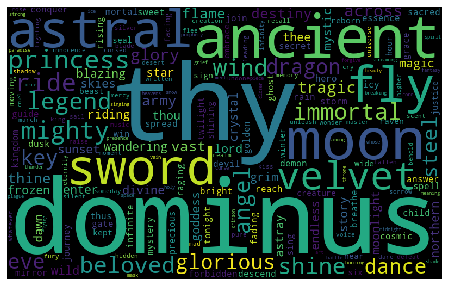

thrash


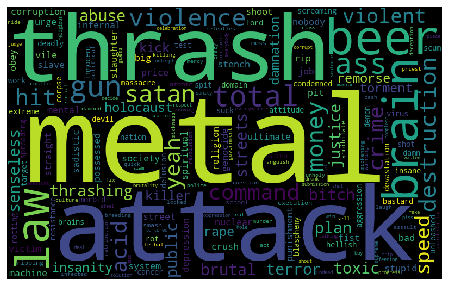

In [8]:
word_freqs = get_wordcloud_frequencies(corpus, tfidf=True, min_df=50)
for i, genre in enumerate(genres):
    print(genre)
    word_cloud = WordCloud(width=800, height=500).fit_words(word_freqs[i])
    plt.figure(figsize=(8, 5))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()